# Lab 08 - RC circuits II

Edit this cell and provide the information requested:

- Your name: Mary Hosseini
- Your student number: 41004235
- Partner's name: Lucy Macdonell

In [1]:
%reset -f
import numpy as np
import data_entry2
import matplotlib.pyplot as plt

## PART A - INTRO

### Experimental Goal Revised From Lab 7
A comparison between a high-precision determination of the capacitance of your capacitor from the slope of a tau versus R graph and the capacitance measured directly using a capacitance meter

### Least Squares Fitting Using The Weighted Chi-squared
A 2 step process:
1) Find the best fit by minimizing $x_w^2$
2) Judge the fit using the value of $x_w^2$ as well as the residuals
- Side Note: we will be using a 1-parameter model, $f(x)=mx$

### Recap of 1-parameter analytical solution to Minimizing $x_w^2$
- We take the derivative of chi-squared with respect to the slope and set it equal to zero

- Slope uncertainty can be improved by three different things:
1) Reduce $u_y$ (higher precision for individual data points)
2) Increase the number of points (sum gets bigger)
3) Use a larger range of $x_i$

### Using Chi-squared is a 2-step process
1) Determine the parameters that give the best fit by minimizing $x_w^2$
2) Once minimized, interpret the value.
    - Bigger than one: not a good fit and/or the uncertainties have been underestimated
    - Equals to one: The model fits the data well, assuming uncertainties have been characterized well
    - Less than one: The uncertainties are likely to have been overestimated
  
### A Good Fit
- $x_w^2$ equals 1
- $\frac{2}{3}$ of measurements within 1 deviation of the residuals zero-line
- Almost all (95%) within 2 standard deviations of the residuals zero line
- No trend in the data (data seems randomly scattered about the residuals zero line)

### Experimental Goal
A comparison between a high-precision determination of the capacitance of your capacitor from the slope of a tau versus R graph and the capacitance measured directly using a capacitance meter

## PART B - FAMILIARIZATION & IMPROVEMENT REFLECTIONS

### Measurement Strategy Improvements:
- Take the points further apart not that it is on the flat side of the curve, but Further apart so that it is still on the decaying side of the curve. This increases the accuracy since it increases the change in t (so it increases the range of x therefore we have more data points). This will then help decrease uncertainty. 
- One person taking the measurements so that the measurements are more likely to be consistent.

Order:
1) Place the y cursor and then the x cursor in their correct spot. 

## PART C - DATA COLLECTION

### Uncertainties
#### Voltage:
- Gaussian uncertainty
- 8/4 = 2mV
- Since the voltage goes up by 4 and goes down by 4 (the total range is 8)
- 0.002V
#### Time:
- Rectangular uncertainty
- 4ms/sqrt(3) = (4 * 10^(-6))/sqrt(3)

In [2]:
de1 = data_entry2.sheet("lab8_data")

Sheet name: lab8_data.csv


## PART D - DATA ANALYSIS AND COMPARISON

Best fit slope m =  0.10899498337881061 +/- 0.0005449417532503013
chi2 = 4.5547


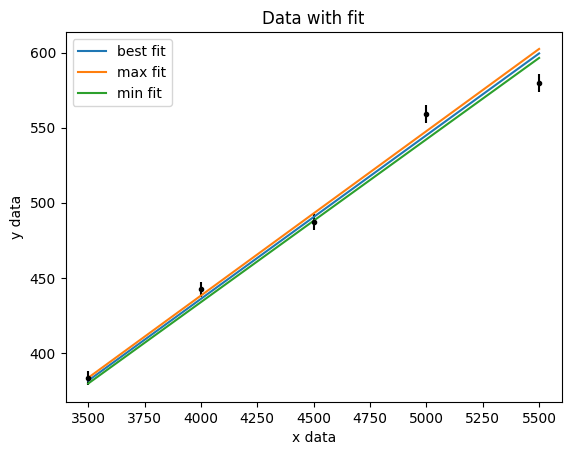

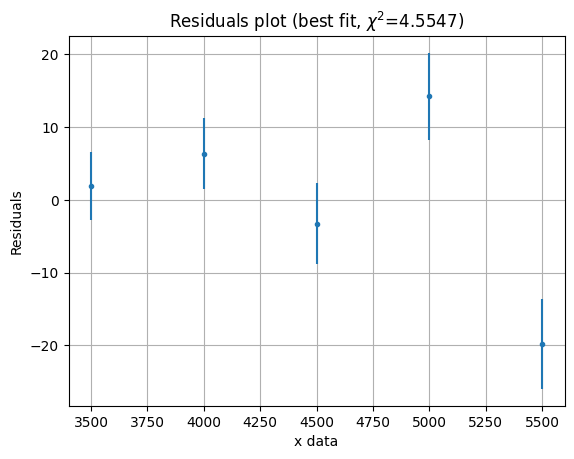

In [8]:
""" Find the best model corresponding to the minimized chi-squared """
# tau
deltat = t2Vec - t1Vec # difference in time between points
W = V1Vec / V2Vec # ratio of voltage
lnW = np.log(W) # taking the logarithm - note that np.log(X) calculates ln(X) in Python
tau = deltat / lnW # calculating the time constant

# utau
udeltat = np.sqrt( ut1Vec**2 + ut2Vec**2 ) 
uW = W * np.sqrt( (uV1Vec/V1Vec)**2 + (uV2Vec/V2Vec)**2 ) 
ulnW = uW / W  
utau = tau * np.sqrt( (udeltat / deltat)**2 + (ulnW / lnW)**2)  

Z = np.sum( (RVec * RVec) / utau**2) # calculate sum(x_i*x_i/(u_y_i)^2)

# Calculate best fit slope
m = np.sum((RVec * tau) / utau**2)*(1/Z)

# Calculate uncertainty in best fit slope
um = np.sqrt(1/Z)

# Print the best fit slope and uncertainty
print("Best fit slope m = ", m, "+/-", um)

# Find max and min slopes based on m and u[m]
mMax = m + um # slope at maximum of 68% CI
mMin = m - um # slope at minimum of 68% CI

""" Construct the models for plotting; calculate residuals """

ymodelBest = m * RVec # best fit model
ymodelMax = mMax * RVec # max model
ymodelMin = mMin * RVec # min model

res = tau - ymodelBest # calculate residuals (best fit)
wres2 = (res/utau)**2 # weighted residuals squared
   
""" Calculate chi-squared """
   
N = len(RVec) # number of data points
P = 1 # number of parameters
chi2 = np.sum(wres2) / (N - P) # calculate chi-squared
print("chi2 = {:.4f}".format(chi2))

""" Plot data and fits """

plt.errorbar(RVec, tau, utau, marker='.', linestyle='', color='k')
plt.plot(RVec, ymodelBest, label="best fit")
plt.plot(RVec, ymodelMax, label="max fit")
plt.plot(RVec, ymodelMin, label="min fit")
plt.xlabel('x data')
plt.ylabel('y data')
plt.title('Data with fit')
plt.legend()
plt.show()

""" Plot residuals for the best fit """

plt.errorbar(RVec, res, utau, marker='.', linestyle='')
plt.xlabel('x data')
plt.ylabel('Residuals')
plt.title('Residuals plot (best fit, $\chi^2$={:.4f})'.format(chi2))
plt.grid()
plt.show()

In [12]:
C1 = 1.09e-07
C2 = 5.44e-10
uC1 = 1.05e-07
uC2 = 2e-7

tscore = np.abs(C1 -C2)/(np.sqrt((uC1)**2 + (uC2)**2))
tscore

0.4801335747509601

W got a t-score of 0.48. Mari and Helen's group got a t-score of 1.2. Hence neither of our groups are confident that given the relative uncertainty, the oscilloscope measurements and the measurement  using the capacitance meter are different.

## PART E - IMPROVEMENTS

We concluded that increasing the range of our values will increase the accuracy of our data. Therefore from the purpose suggestions in the lab instructions, we decided to increase the range of our values. 

In [10]:
de1 = data_entry2.sheet("lab8_data2")

Sheet name: lab8_data2.csv


Best fit slope m =  0.10382940586891437 +/- 0.0009557601043807624
chi2 = 1.4464


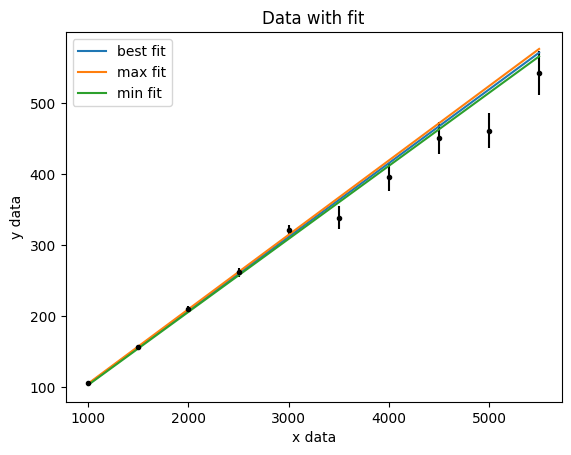

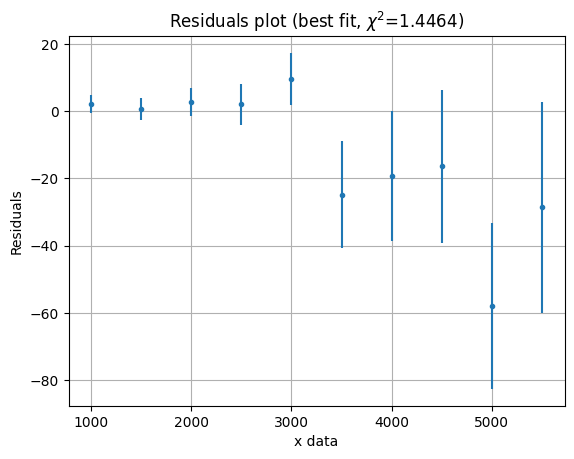

In [11]:
# tau
deltat = t2Vec - t1Vec # difference in time between points
W = V1Vec / V2Vec # ratio of voltage
lnW = np.log(W) # taking the logarithm - note that np.log(X) calculates ln(X) in Python
tau = deltat / lnW # calculating the time constant

# utau
udeltat = np.sqrt( ut1Vec**2 + ut2Vec**2 ) 
uW = W * np.sqrt( (uV1Vec/V1Vec)**2 + (uV2Vec/V2Vec)**2 ) 
ulnW = uW / W  
utau = tau * np.sqrt( (udeltat / deltat)**2 + (ulnW / lnW)**2)  

Z = np.sum( (RVec * RVec) / utau**2) # calculate sum(x_i*x_i/(u_y_i)^2)

# Calculate best fit slope
m = np.sum((RVec * tau) / utau**2)*(1/Z)

# Calculate uncertainty in best fit slope
um = np.sqrt(1/Z)

# Print the best fit slope and uncertainty
print("Best fit slope m = ", m, "+/-", um)

# Find max and min slopes based on m and u[m]
mMax = m + um # slope at maximum of 68% CI
mMin = m - um # slope at minimum of 68% CI

""" Construct the models for plotting; calculate residuals """

ymodelBest = m * RVec # best fit model
ymodelMax = mMax * RVec # max model
ymodelMin = mMin * RVec # min model

res = tau - ymodelBest # calculate residuals (best fit)
wres2 = (res/utau)**2 # weighted residuals squared
   
""" Calculate chi-squared """
   
N = len(RVec) # number of data points
P = 1 # number of parameters
chi2 = np.sum(wres2) / (N - P) # calculate chi-squared
print("chi2 = {:.4f}".format(chi2))

""" Plot data and fits """

plt.errorbar(RVec, tau, utau, marker='.', linestyle='', color='k')
plt.plot(RVec, ymodelBest, label="best fit")
plt.plot(RVec, ymodelMax, label="max fit")
plt.plot(RVec, ymodelMin, label="min fit")
plt.xlabel('x data')
plt.ylabel('y data')
plt.title('Data with fit')
plt.legend()
plt.show()

""" Plot residuals for the best fit """

plt.errorbar(RVec, res, utau, marker='.', linestyle='')
plt.xlabel('x data')
plt.ylabel('Residuals')
plt.title('Residuals plot (best fit, $\chi^2$={:.4f})'.format(chi2))
plt.grid()
plt.show()

In [14]:
C1 = 1.04e-07
C2 = 5.44e-10
uC1 = 1.05e-07
uC2 = 2e-7

tscore = np.abs(C1 -C2)/(np.sqrt((uC1)**2 + (uC2)**2))
tscore

0.4579986271800115

## PART F - Finishing Things Off

Suki and Emily's Group had a capacitance of 9.9*10^-8 + 3.8*10^-10 with a relative uncertainty of 0.0039. They also increased their number of measurements for better accuracy. We both found that increasing our measurements improved our overall t-score, theirs changed to 0.85 and ours improved to 0.51. However, we both agreed that based on our results we cannot be certain/confident that given our relative uncertainty, the oscilloscope measurements and the measurement using the capacitance meter are different.
We had a minimized chi-squared value of 1.5 in our second round of data whereas in the first round, we got 4.5. 

# Submit

Steps for submission:

1. Click: Run => Run_All_Cells
2. Read through the notebook to ensure all the cells executed correctly and without error.
3. File => Save_and_Export_Notebook_As->HTML
4. Inspect your exported html
5. Upload the HTML document to the lab submission assignment on Canvas.

In [ ]:
display_sheets()